In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
#importing the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.drop(crop[crop.label == 'muskmelon'].index, inplace = True )

In [3]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 147.7+ KB


In [4]:
#checking for null values
data.isnull().sum().any()

False

In [5]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2100 

column Name :  HUMIDITY
No. of unique values : 2100 

column Name :  PH
No. of unique values : 2100 

column Name :  RAINFALL
No. of unique values : 2100 

column Name :  LABEL
No. of unique values : 21 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


In [6]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19


In [8]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [9]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [10]:
#dropping duplicate values
data = data.drop_duplicates()

<AxesSubplot:>

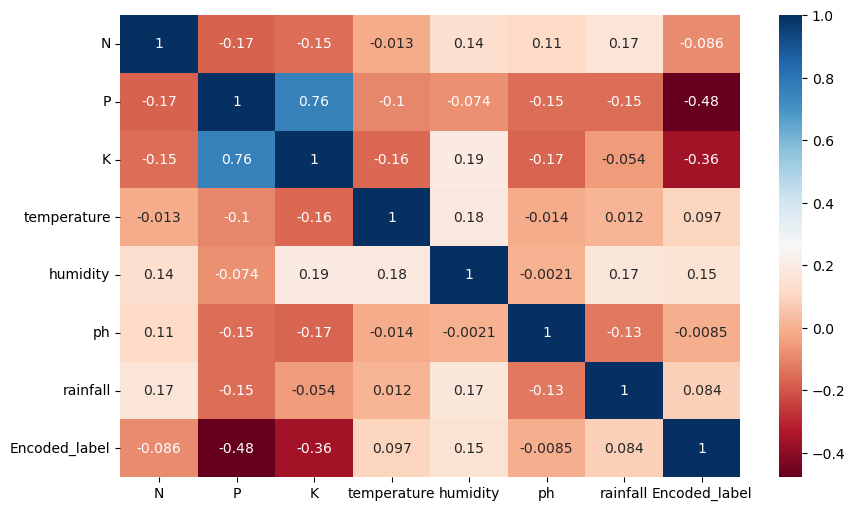

In [11]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

In [12]:
#EDA
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,48.181905,55.060000,48.057143,25.471157,70.488397,6.474750,107.214784,10.000000
std,36.016740,32.772902,51.833864,5.134671,22.303929,0.790175,53.425191,6.056743
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,30.920140,0.000000
25%,20.000000,31.000000,20.000000,22.602437,59.237124,5.948298,67.133894,5.000000
50%,36.000000,53.000000,30.000000,25.373357,79.995776,6.431478,97.659622,10.000000
75%,80.250000,69.000000,47.000000,28.282950,88.018773,6.945725,130.140535,15.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,20.000000


Variable Name : N


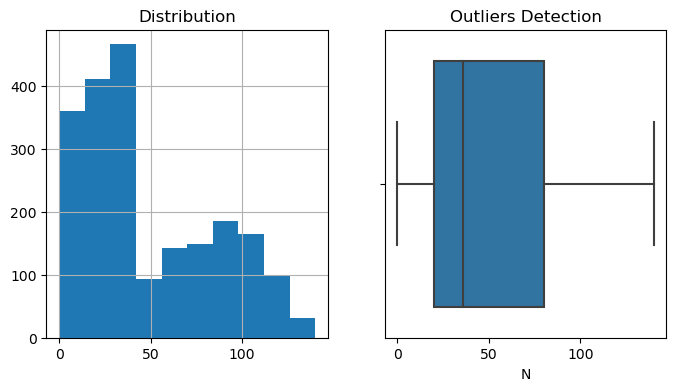



Variable Name : P


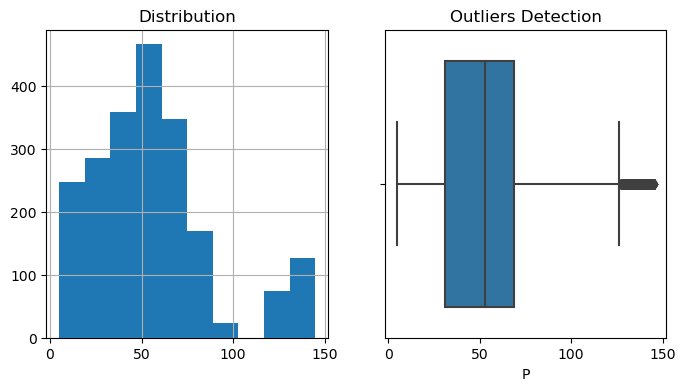



Variable Name : K


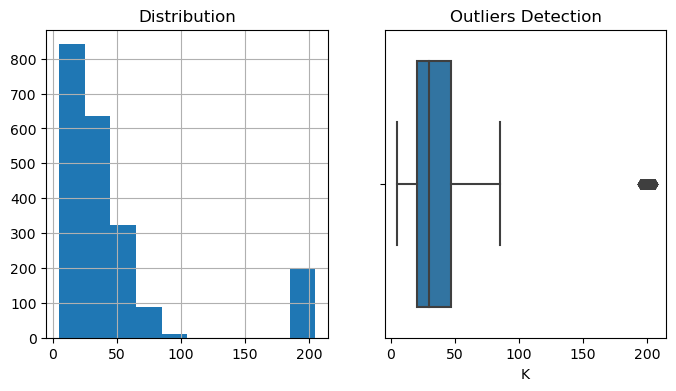



Variable Name : TEMPERATURE


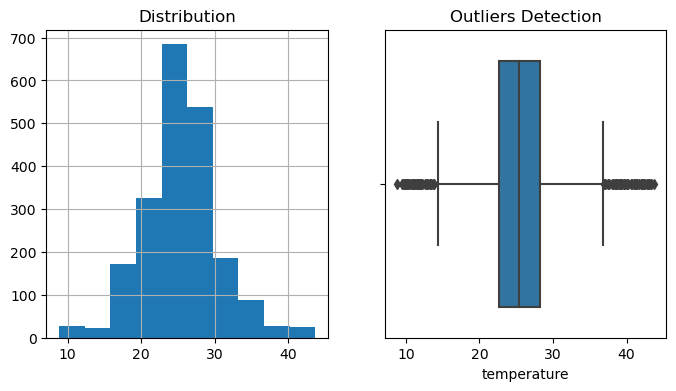



Variable Name : HUMIDITY


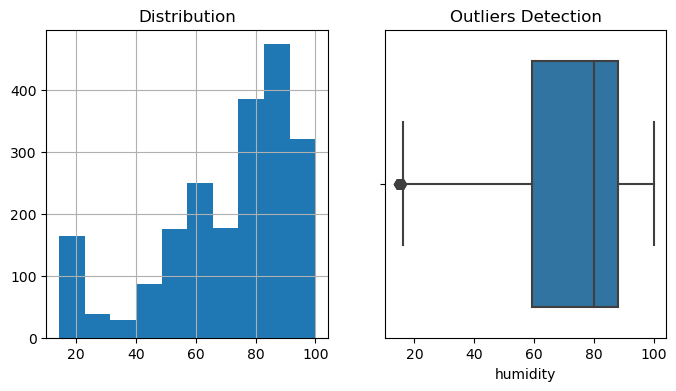



Variable Name : PH


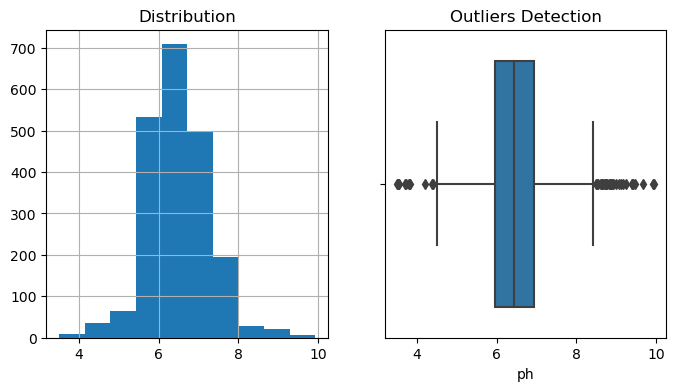



Variable Name : RAINFALL


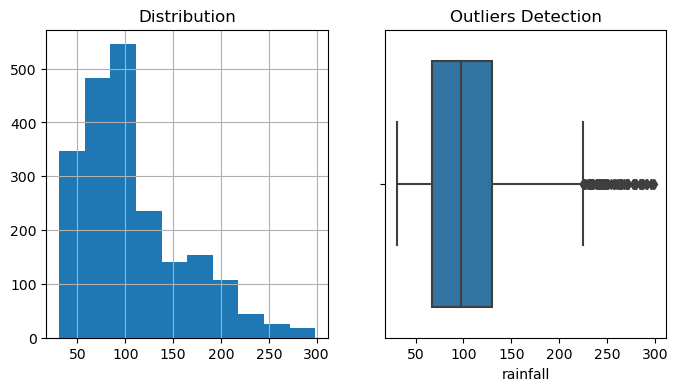

In [13]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


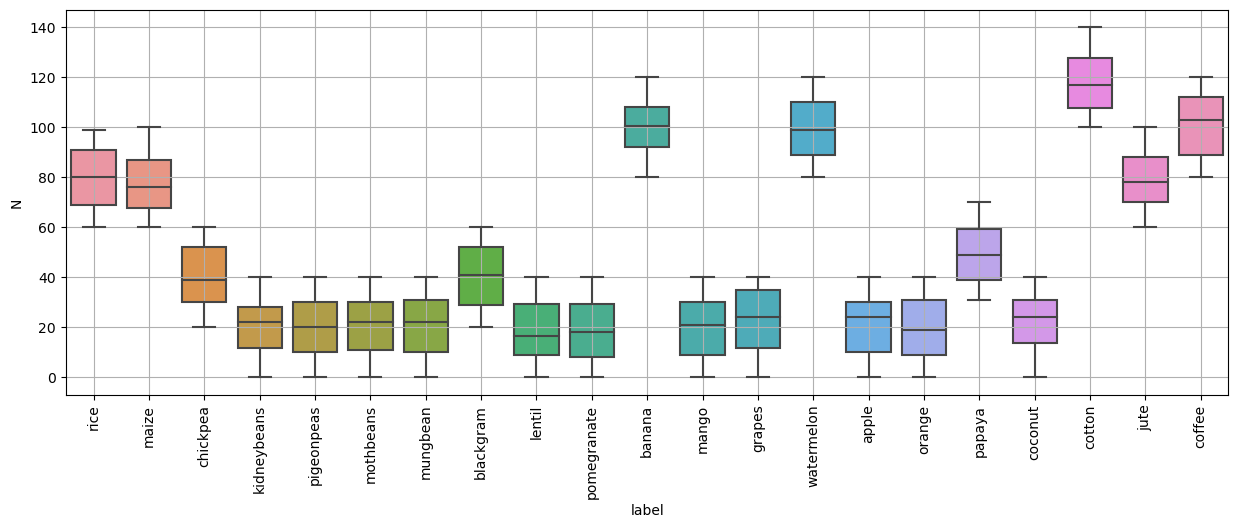

Variable : P


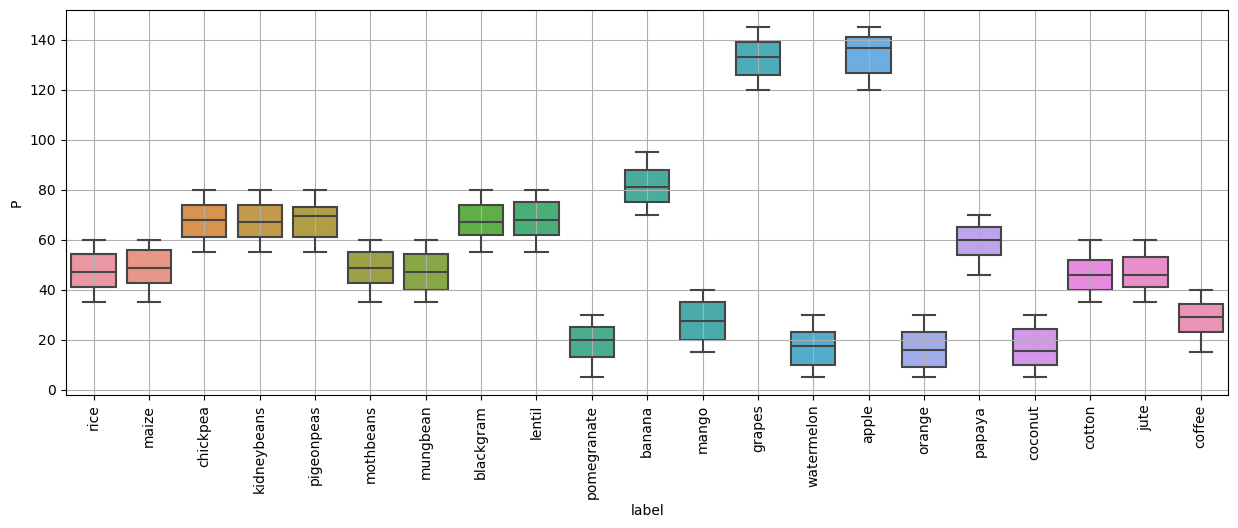

Variable : K


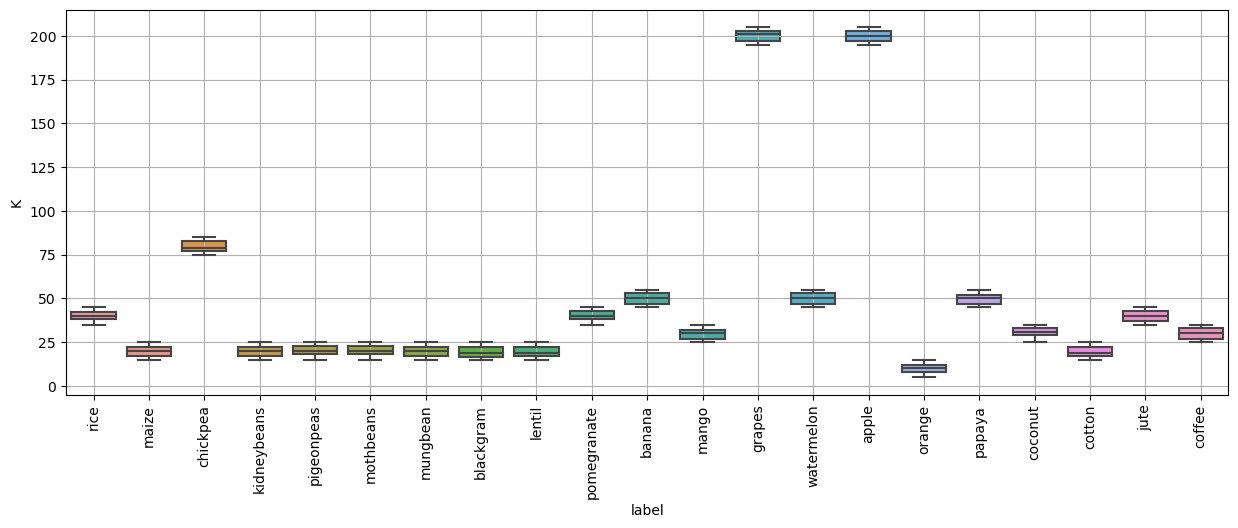

Variable : TEMPERATURE


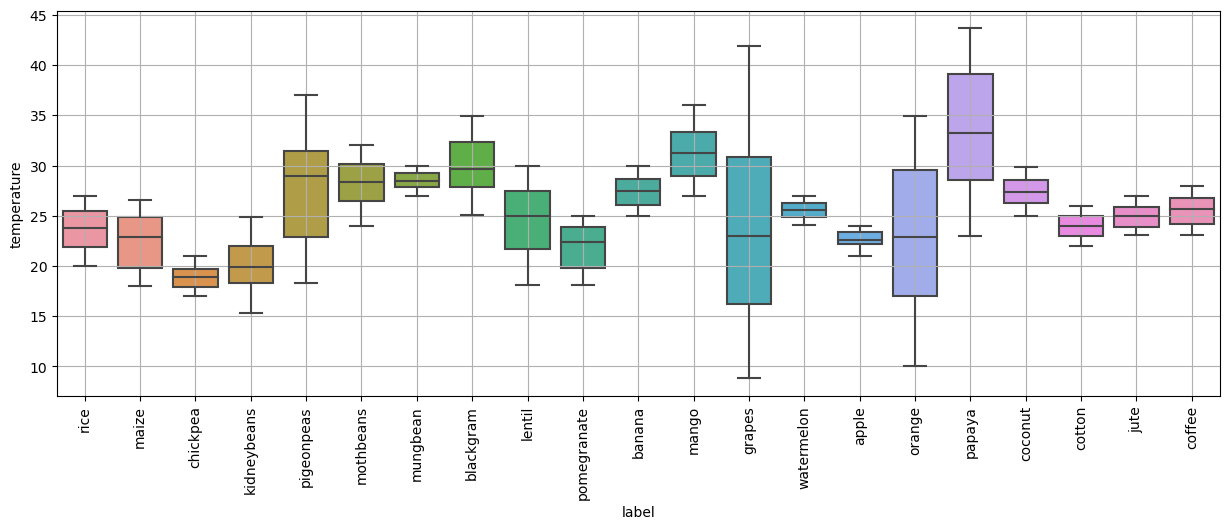

Variable : HUMIDITY


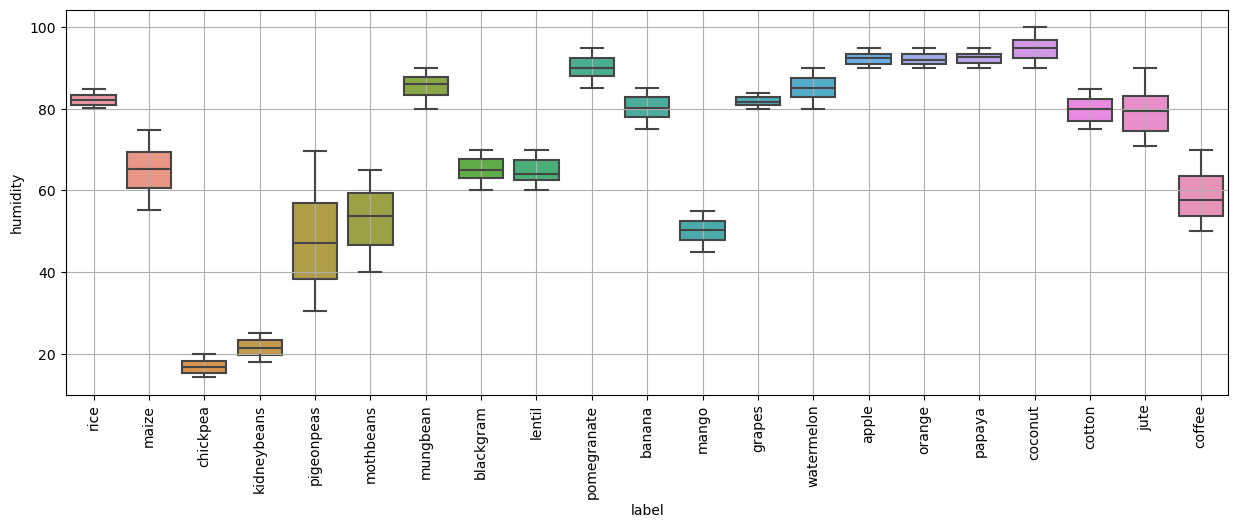

Variable : PH


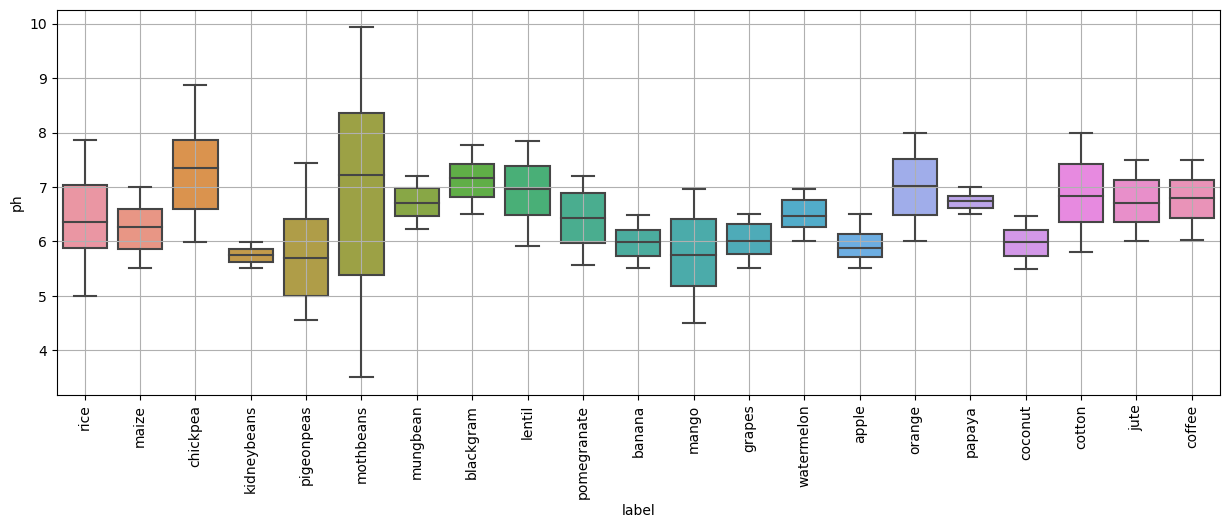

Variable : RAINFALL


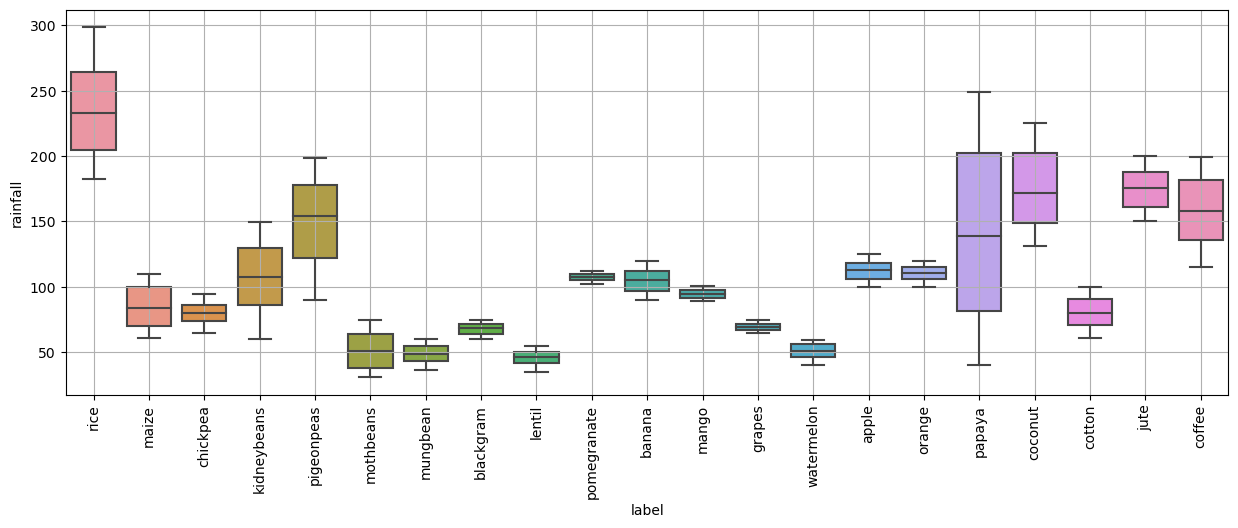

In [14]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

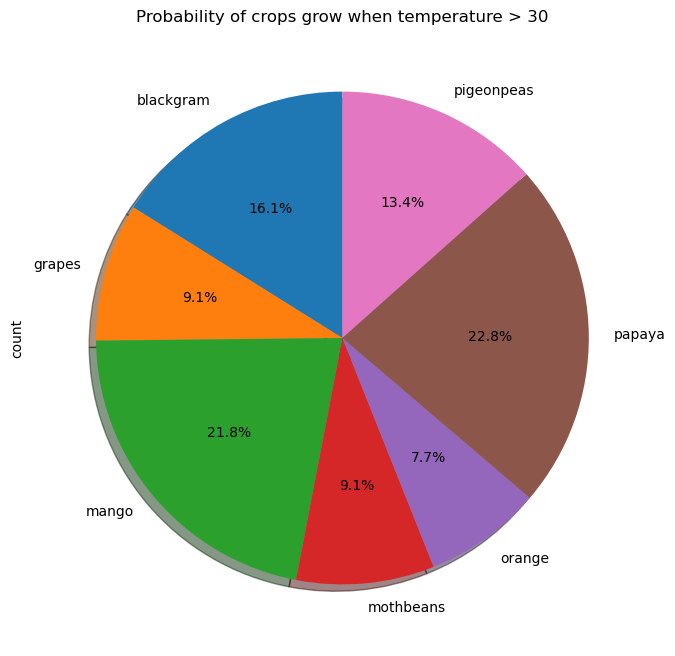

In [15]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

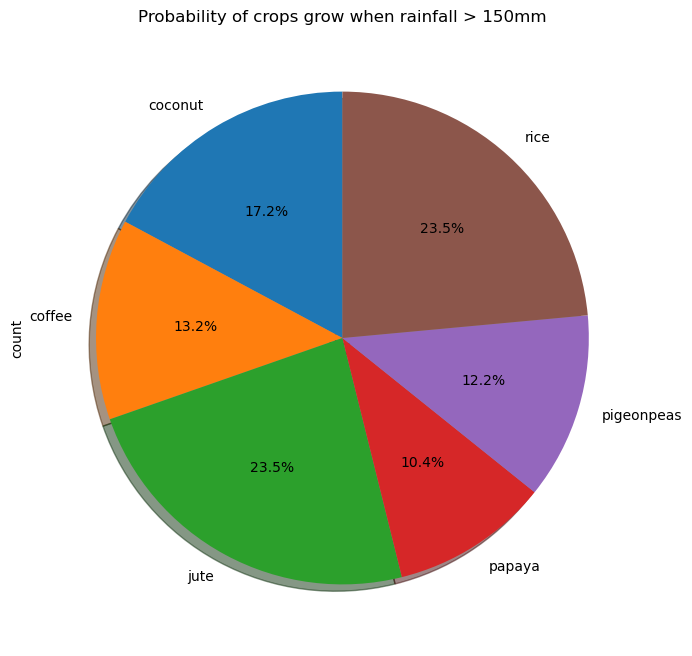

In [16]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

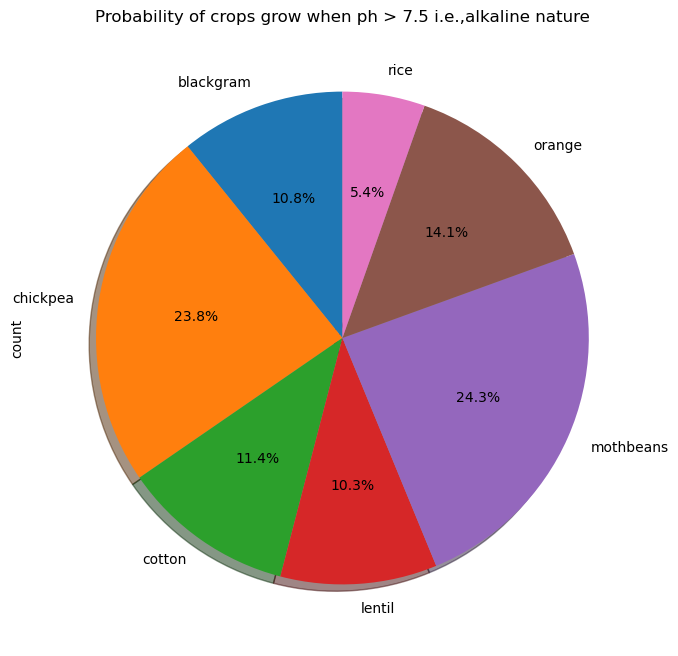

In [17]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

In [18]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    19
1    19
2    19
3    19
4    19
Name: Encoded_label, dtype: int32


In [19]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1680, 7), x_test = (420, 7), y_train = (1680,), y_test = (420,)


In [20]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier


In [21]:
#initializing the model and fitting for train data
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand

0.9928571428571429

In [22]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [25]:
df=pd.read_csv("Crop_recommendation.csv")

In [26]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [27]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [29]:
corr=df.columns
corr

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [30]:
# lets check summery for all the Classes

print("Average N : {0:.2f}".format(df['N'].mean()))
print("Average P : {0:.2f}".format(df['P'].mean()))
print("Average K : {0:.2f}".format(df['K'].mean()))
print("Average temperature : {0:.2f}".format(df['temperature'].mean()))
print("Average ph : {0:.2f}".format(df['ph'].mean()))
print("Average rainfall : {0:.2f}".format(df['rainfall'].mean()))

Average N : 50.55
Average P : 53.36
Average K : 48.15
Average temperature : 25.62
Average ph : 6.47
Average rainfall : 103.46


In [31]:
df.drop_duplicates(inplace=True) # duplicate data drop if any

In [32]:
df.skew().sort_values(ascending=True)

humidity      -1.091708
temperature    0.184933
ph             0.283929
N              0.509721
rainfall       0.965756
P              1.010773
K              2.375167
dtype: float64

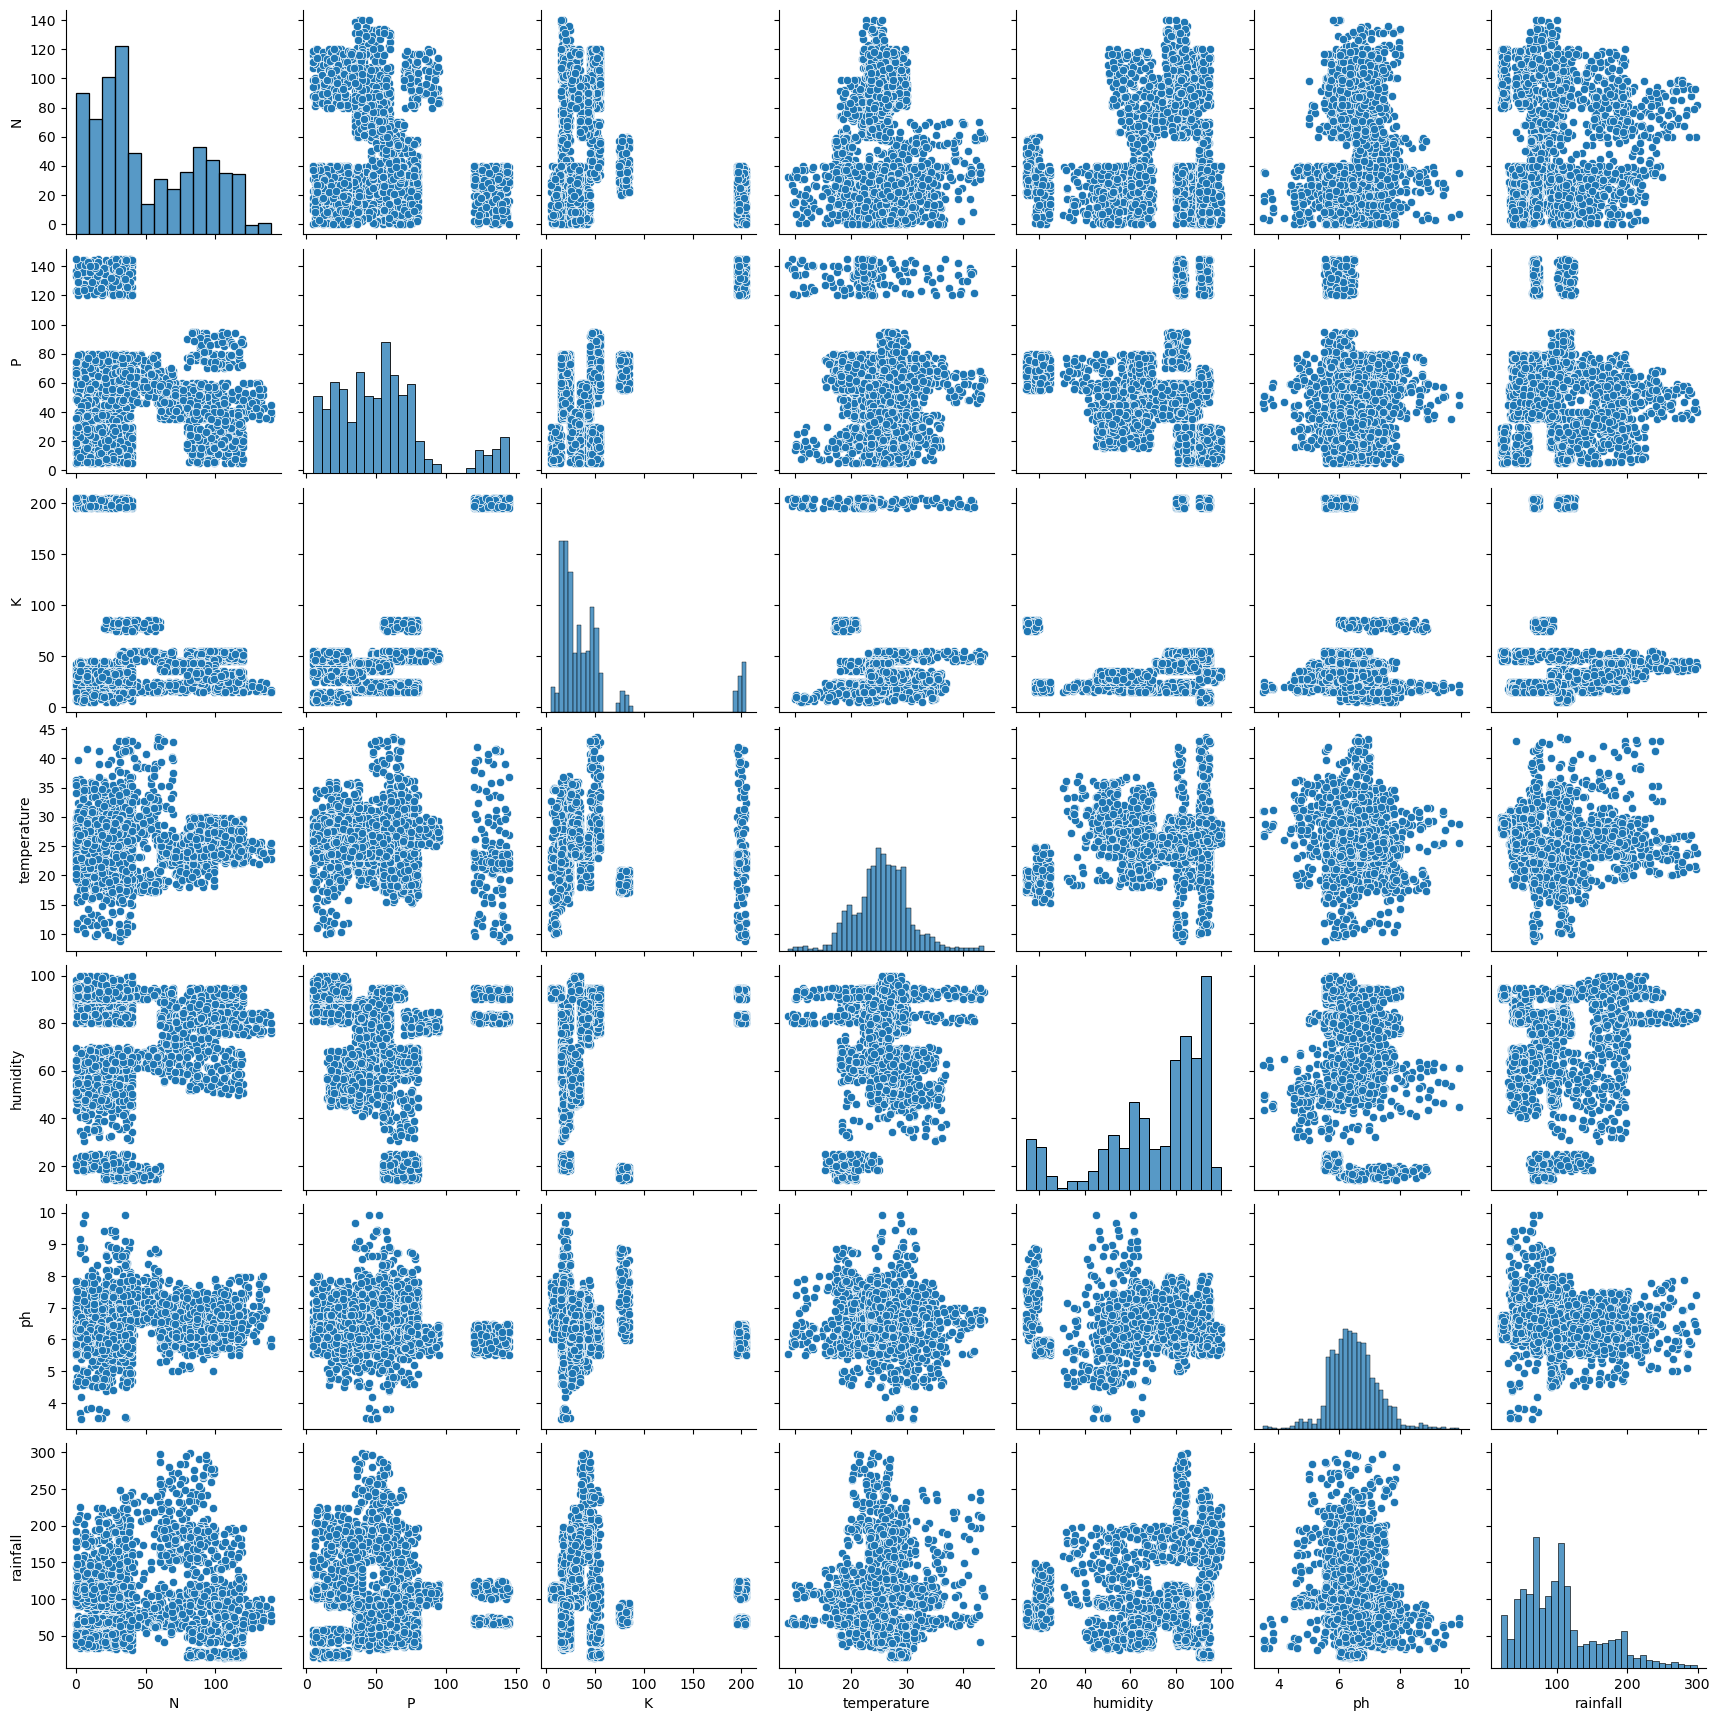

In [33]:
sns.pairplot(df)
plt.show()

<Figure size 1500x2000 with 0 Axes>

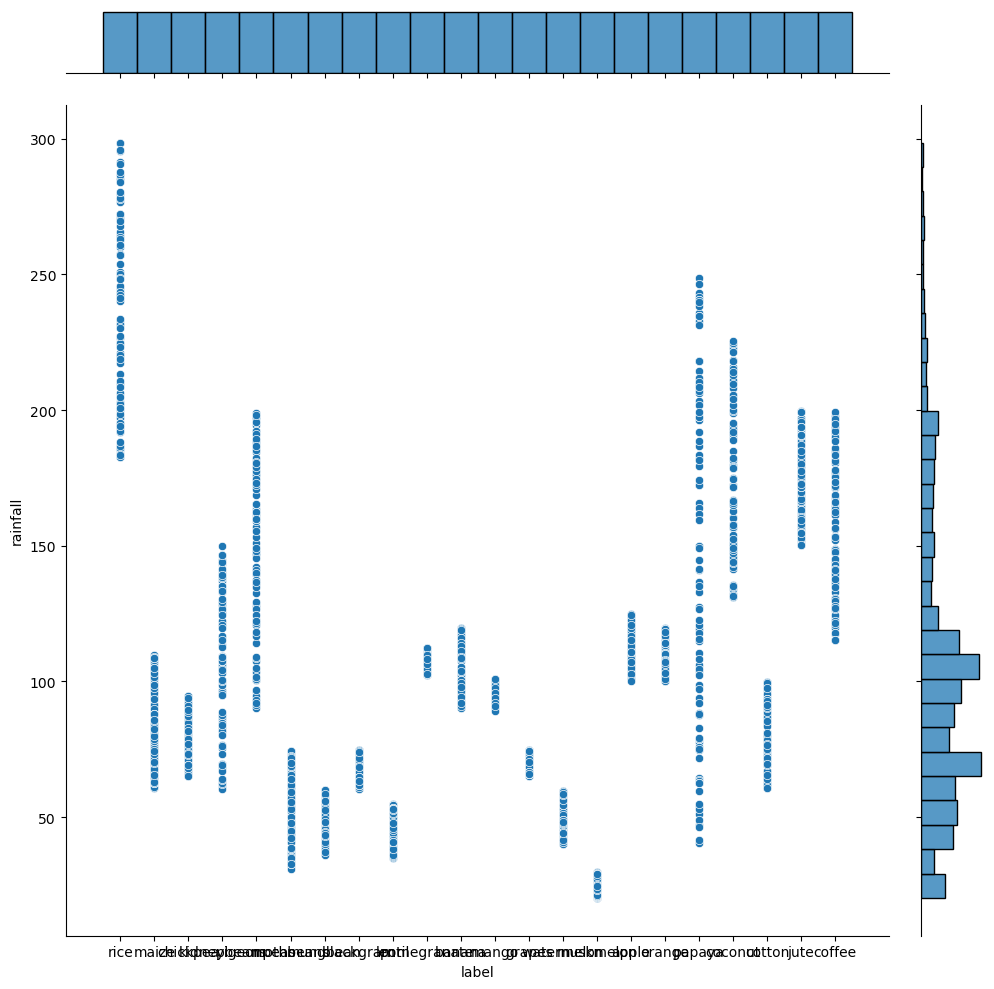

In [56]:
# Defining Target Variable
 
plt.figure(figsize = (15,20))
sns.jointplot(data=df, x="label", y="rainfall", kind='scatter',height=10,ratio=9,space=0.5)
plt.show()

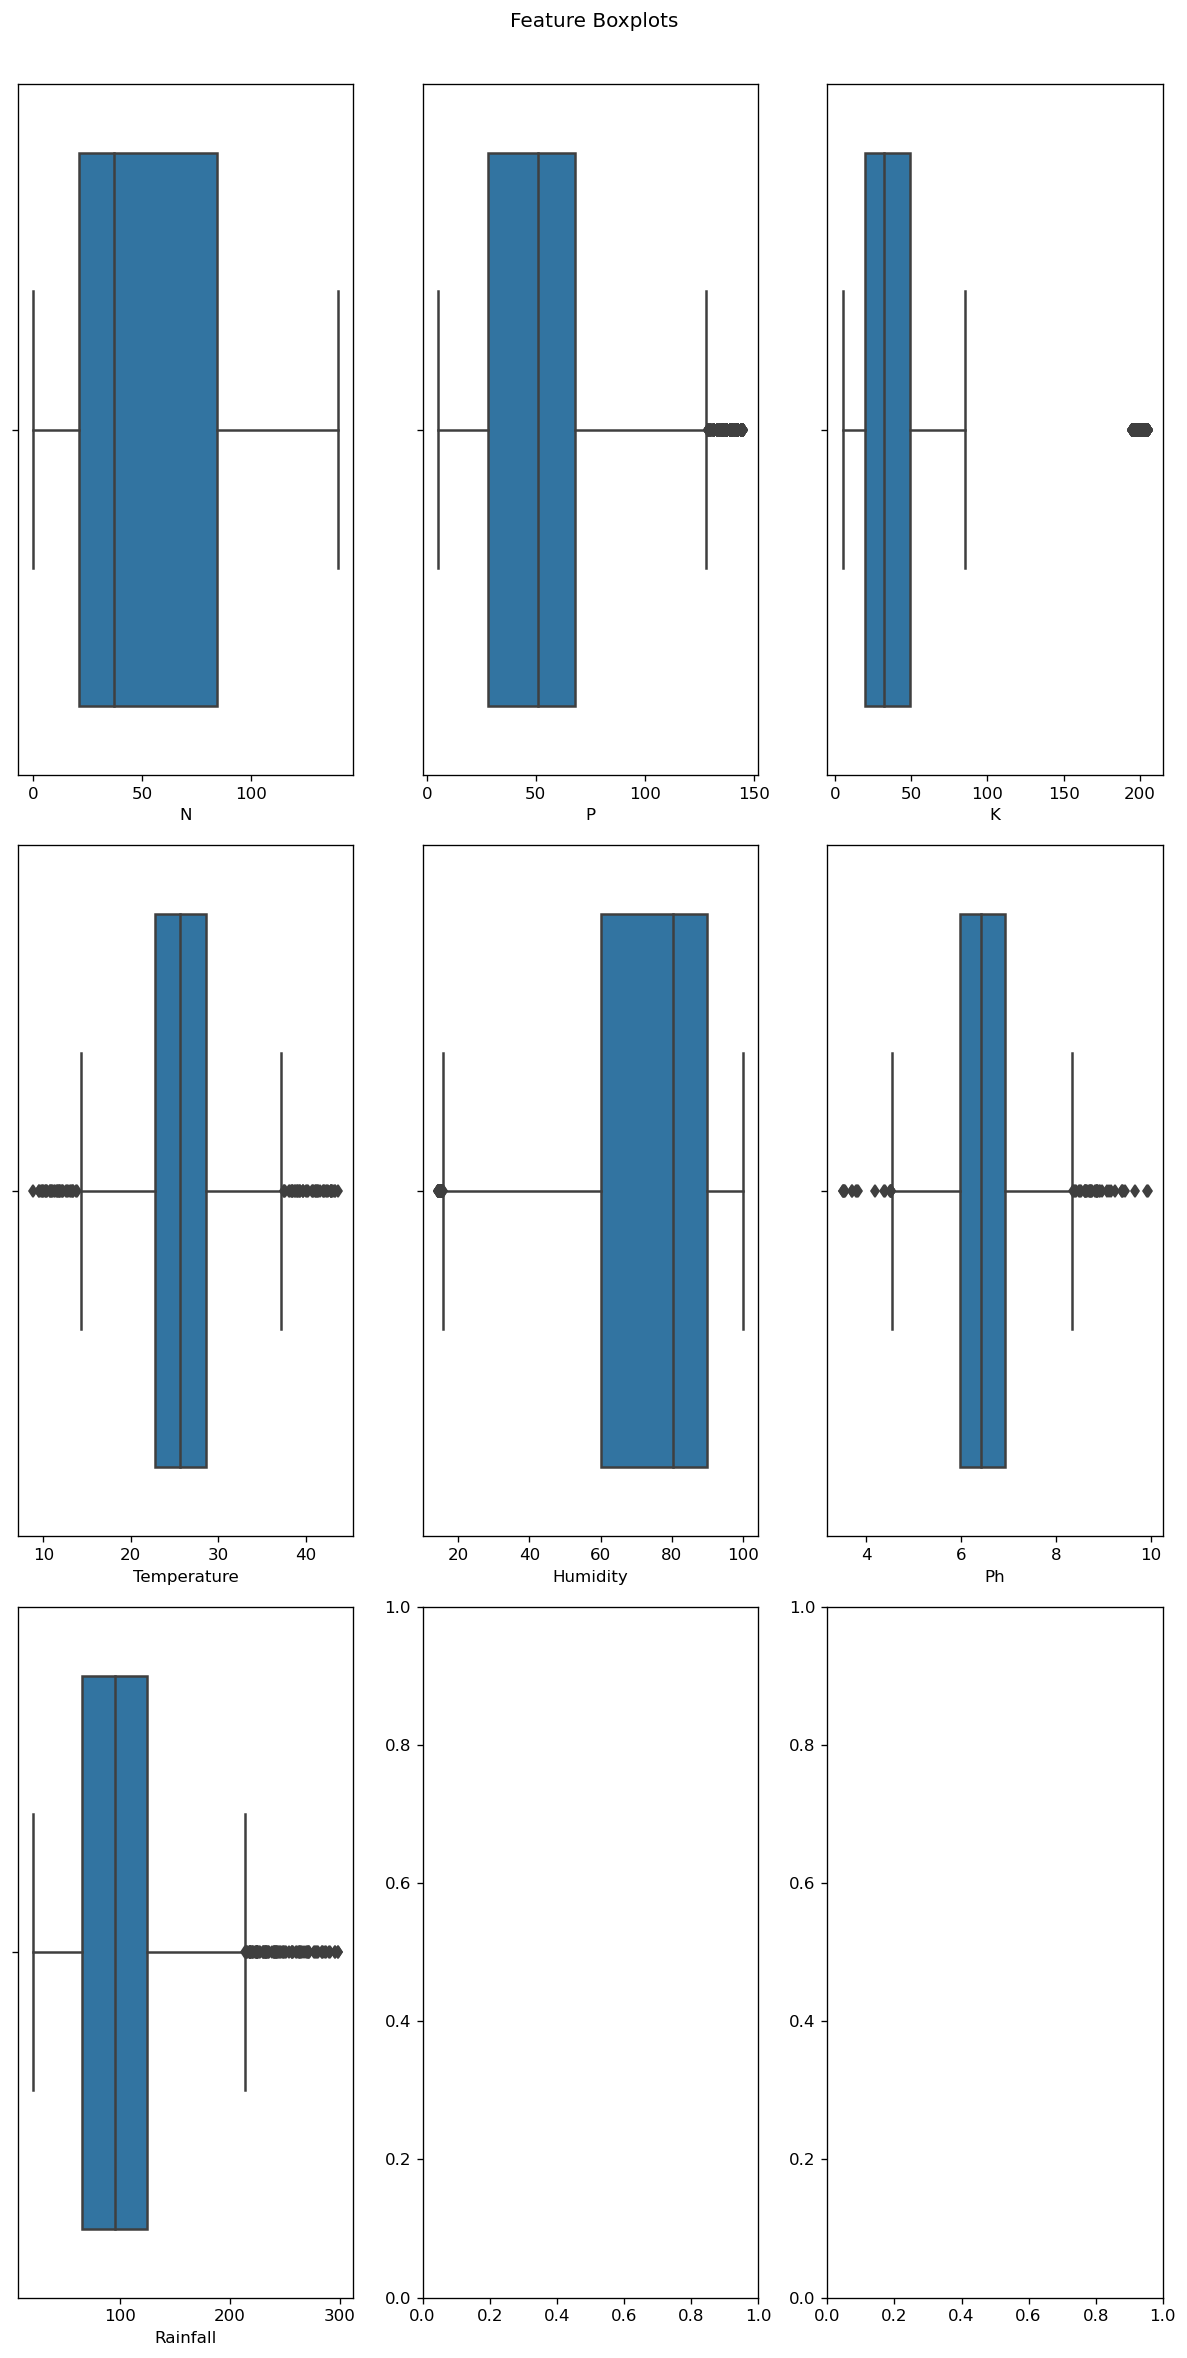

In [59]:
# from graph you can clearly see that rice needs more rainfall
fig, axes = plt.subplots(3, 3, figsize=(10, 20), dpi=120)
for i, j in zip(corr[:7], axes.flatten()):
    sns.boxplot(data=df, x=i, ax=j)
    j.set_xlabel(f"{i.title().replace('_', ' ')}")
plt.suptitle(f"Feature Boxplots")
plt.tight_layout()
plt.subplots_adjust(top=0.95);
plt.show()

In [60]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


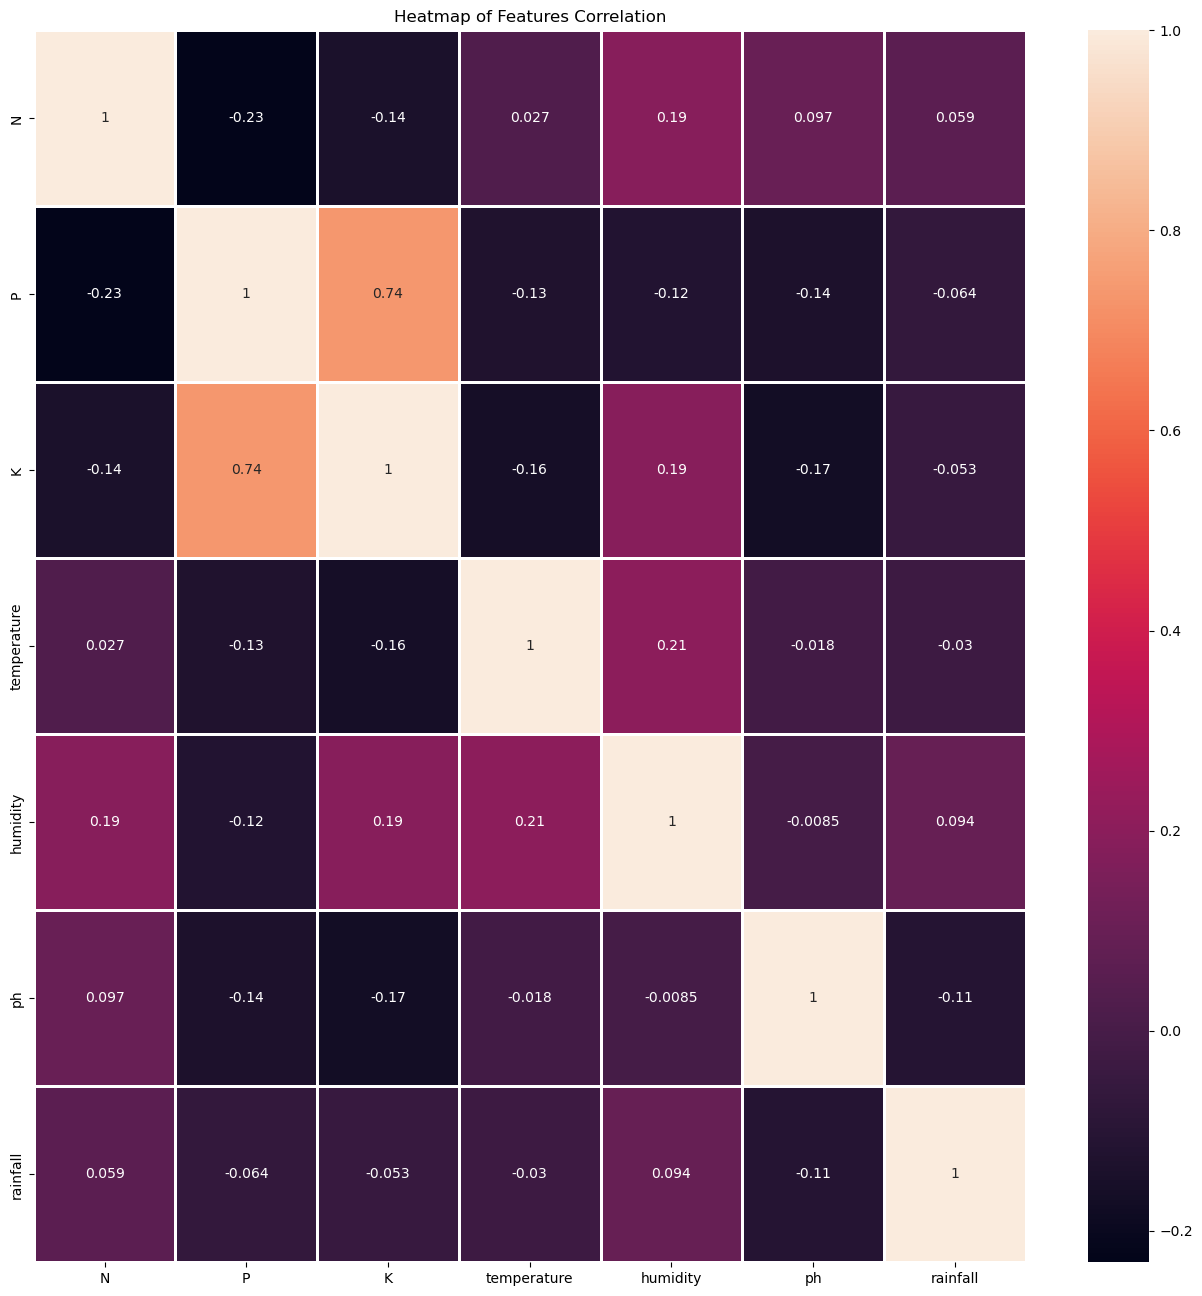

In [61]:
corr=df.corr()
plt.subplots(figsize = (16, 16))
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr, linewidth = 0.80, annot=True,linecolor='white',robust=True)
plt.show()

N
Skewness :  0.51


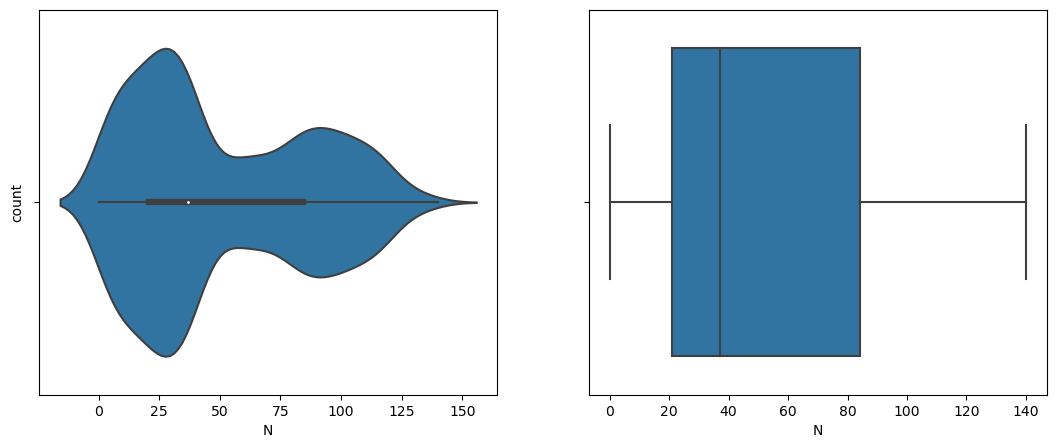

P
Skewness :  1.011


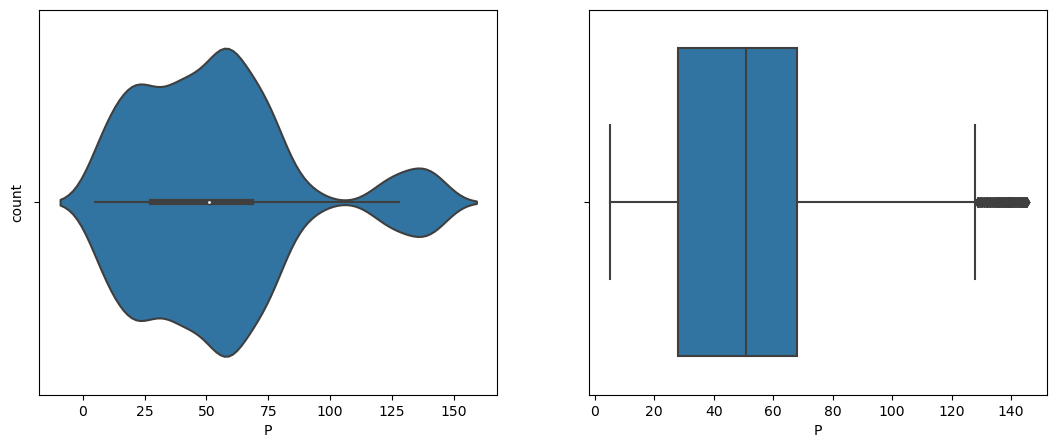

K
Skewness :  2.375


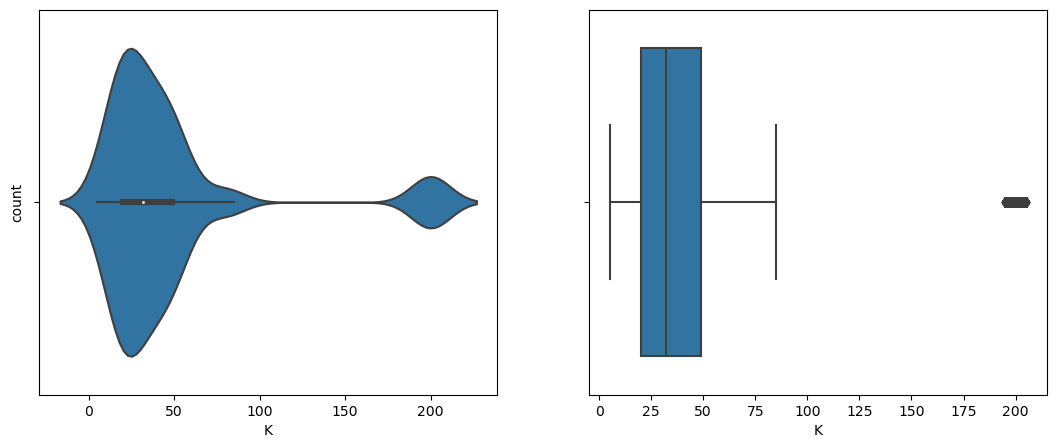

temperature
Skewness :  0.185


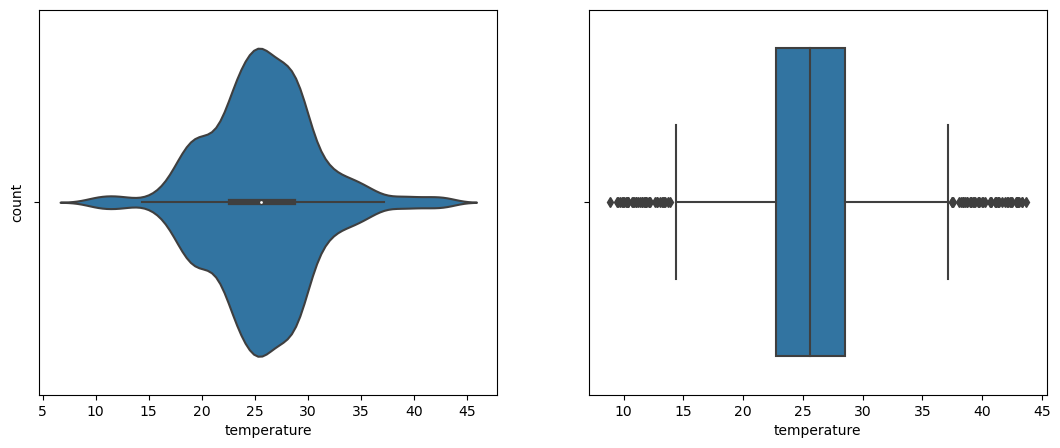

humidity
Skewness :  -1.092


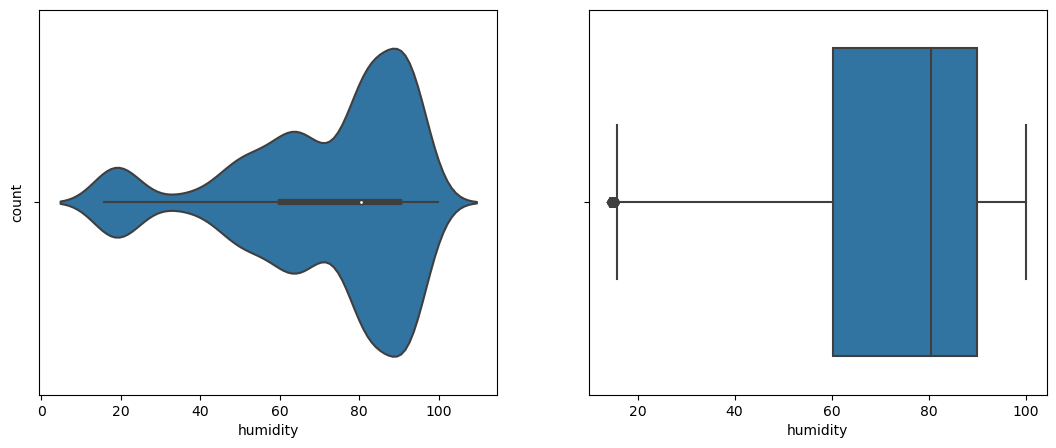

ph
Skewness :  0.284


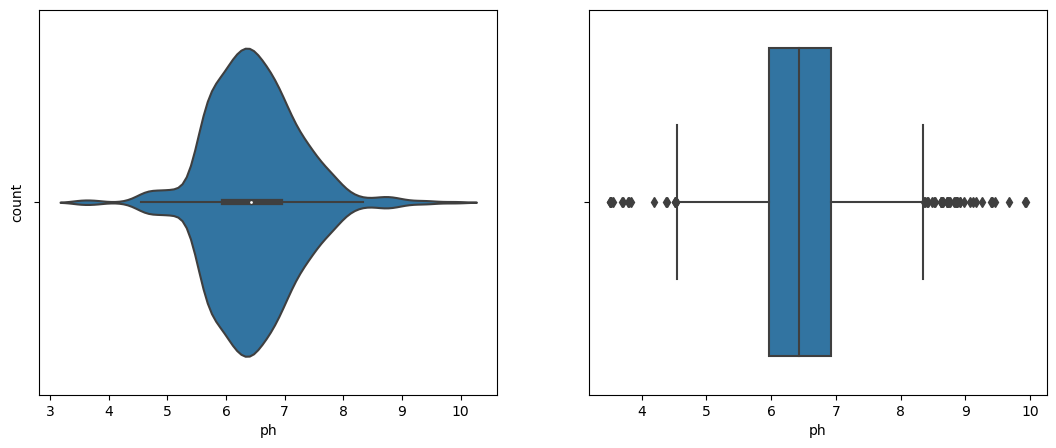

rainfall
Skewness :  0.966


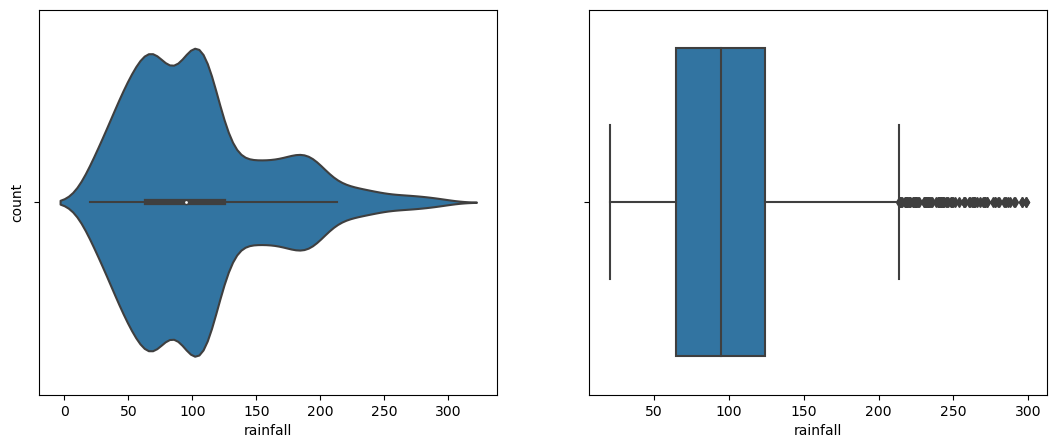

label


TypeError: could not convert string to float: 'rice'

In [62]:
# Lets check outliers 

for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(13,5))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()    

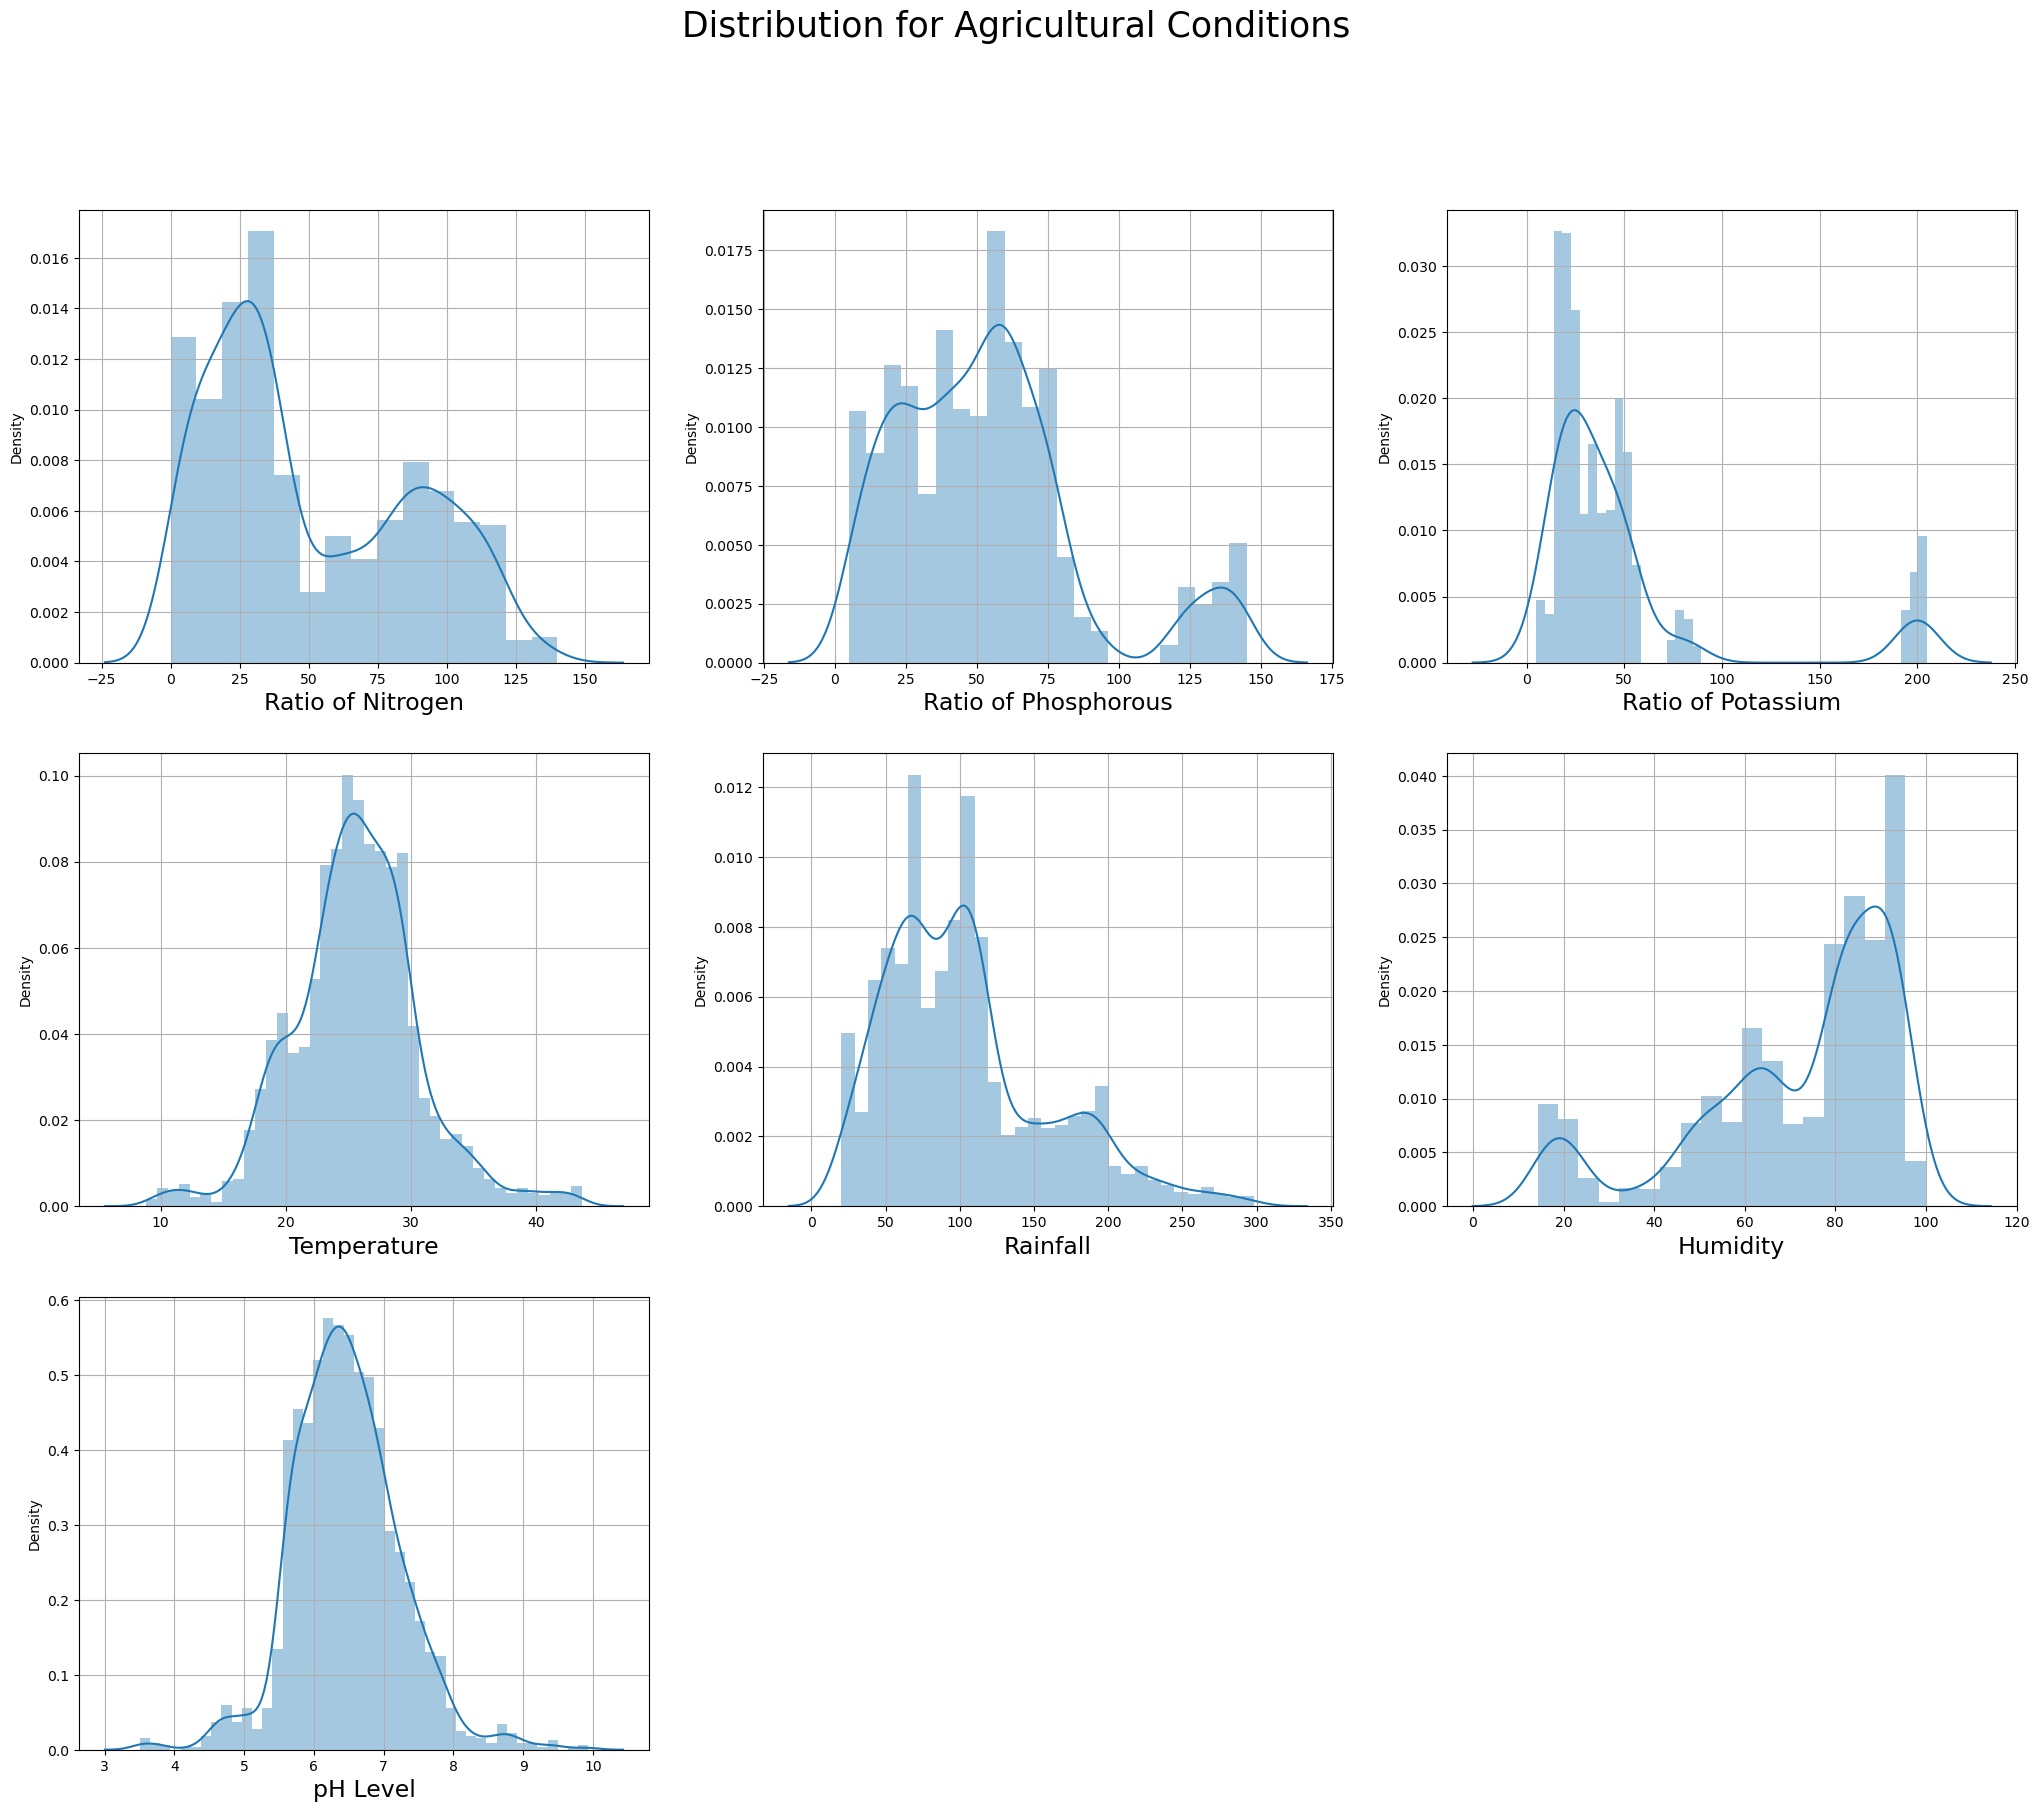

In [69]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (25, 20)

plt.subplot(3, 3, 1)
sns.distplot(df['N'])
plt.xlabel('Ratio of Nitrogen', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 2)
sns.distplot(df['P'])
plt.xlabel('Ratio of Phosphorous', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 3)
sns.distplot(df['K'])
plt.xlabel('Ratio of Potassium', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 4)
sns.distplot(df['temperature'])
plt.xlabel('Temperature', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 5)
sns.distplot(df['rainfall'])
plt.xlabel('Rainfall', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 6)
sns.distplot(df['humidity'])
plt.xlabel('Humidity', fontsize = 17)
plt.grid()

plt.subplot(3, 3, 7)
sns.distplot(df['ph'])
plt.xlabel('pH Level', fontsize = 17)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 25)
plt.show()

In [70]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [71]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [72]:
### Lets try to Cluster these Crops

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_df  = pd.DataFrame(x)
x_df.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


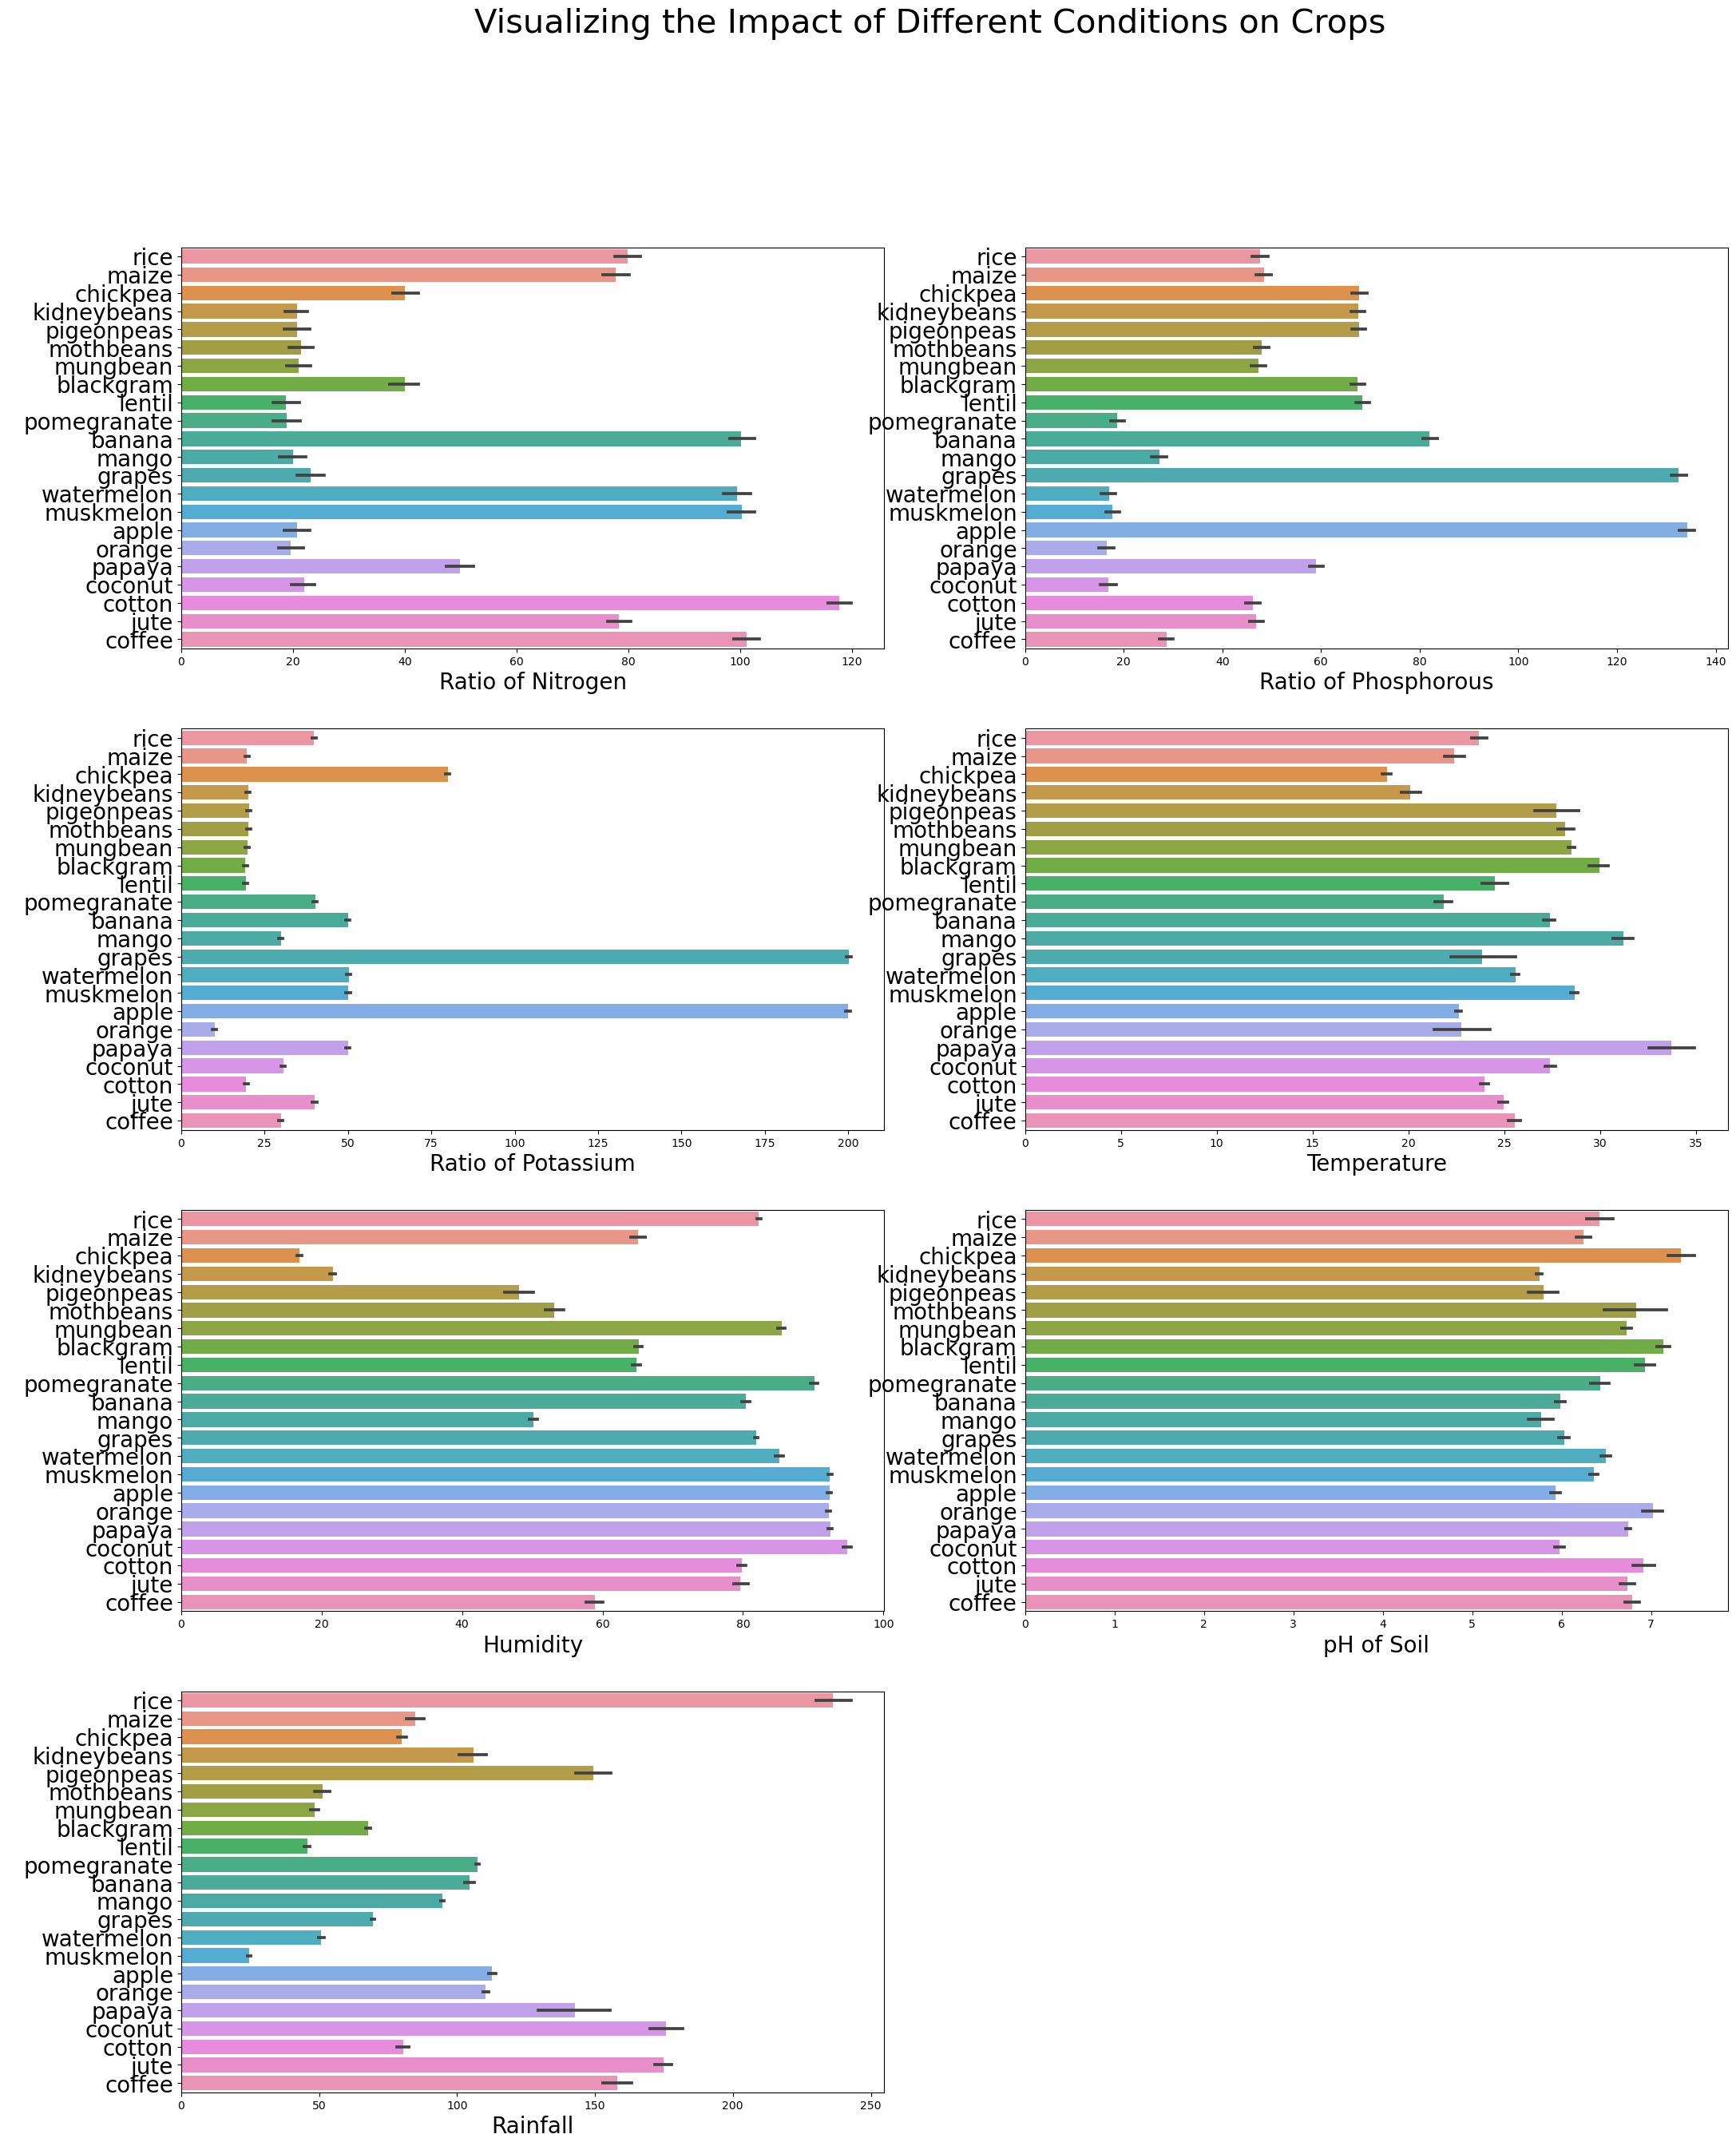

In [79]:
#### Data Visualizations

plt.rcParams['figure.figsize'] = (25,30)

plt.subplot(4, 2, 1)
sns.barplot(df['N'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 2)
sns.barplot(df['P'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 3)
sns.barplot(df['K'], df["label"])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 4)
sns.barplot(df['temperature'], df['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 5)
sns.barplot(df['humidity'], df['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 6)
sns.barplot(df['ph'], df['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(4, 2, 7)
sns.barplot(df['rainfall'], df['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 20)
plt.yticks(fontsize = 20)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 30)
plt.show()

In [80]:
# lets split the Dataset for Predictive Modelling

y = df['label']
X = df.drop(['label'], axis = 1)

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [81]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1680, 7)
The Shape of x test: (420, 7)
The Shape of y train: (1606,)
The Shape of y test: (594,)


In [86]:
pip install lazypredict

     ---------------------------------------- 1.3/1.3 MB 573.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [87]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [88]:
# Fitting the model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:12<00:00,  3.27it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1606, number of used features: 7
[LightGBM] [Info] Start training from score -3.077437
[LightGBM] [Info] Start training from score -3.077437
[LightGBM] [Info] Start training from score -3.104836
[LightGBM] [Info] Start training from score -3.147395
[LightGBM] [Info] Start training from score -2.999475
[LightGBM] [Info] Start training from score -3.050769
[LightGBM] [Info] Start training from score -3.050769
[LightGBM] [Info] Start training from score -3.104836
[LightGBM] [Info] Start training from score -3.133007
[LightGBM] [Info] Start training from score -3.064014
[LightGBM] [Info] Start training from score -2.987053
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.064014
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.34it/s]


In [89]:
# Printing the performance metrics of the models
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
GaussianNB                         0.99               1.00    None      0.99   
BaggingClassifier                  0.99               1.00    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
LabelSpreading                     0.98               0.98    None      0.98   
SVC                                0.98               0.98    None      0.98   
KNeighborsClassifier               0.98               0.98    None      0.98   
LabelPropagation                   0.98               0.98    None      0.98   
DecisionTreeClassifier             0.98 

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
#model
rf=RandomForestClassifier()

#fitting

rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
# predicting via Decision Tree Algorithm

y_pred=rf.predict(X_test)

y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [93]:
# compute accuracy on training set 

rf_train= rf.score(X_train,y_train)

print("Training Data Accuracy by Random Forest Algorithm is : " , round(rf_train,4))

# compute accuracy on testing set 

rf_test= rf.score(X_test,y_test)

print("Testing Data Accuracy by Random Forest Algorithm is : " , round(rf_test,4))

Training Data Accuracy by Random Forest Algorithm is :  1.0
Testing Data Accuracy by Random Forest Algorithm is :  0.9966


In [94]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [95]:
pred = rf.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Recomended Crop for Given Climatic Condition is :", pred)

The Recomended Crop for Given Climatic Condition is : ['rice']


In [96]:
pred = rf.predict((np.array([[120,70,60,16,40,4,120]])))
print("The Recomended Crop for Given Climatic Condition is :", pred)

The Recomended Crop for Given Climatic Condition is : ['banana']
